Compare Customer Spending Before and After Discount

In [36]:
# importing necessary libraries
import pandas as pd

In [37]:
# Loading the Dataset
discount_df = pd.read_csv('discount_campaign.csv')

In [38]:
discount_df.head()

,customer_id,discount_applied,order_count_before,order_count_after,total_spend_before,total_spend_after
0,1286,No,4,11,1736.119038,3601.461583
1,1563,Yes,10,2,923.649992,387.822968
2,1289,No,2,8,3526.359734,9705.813801
3,1053,No,4,3,1683.084961,326.592907
4,1516,Yes,19,2,3746.981815,6747.656727


In [39]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   discount_applied    500 non-null    object 
 2   order_count_before  500 non-null    int64  
 3   order_count_after   500 non-null    int64  
 4   total_spend_before  500 non-null    float64
 5   total_spend_after   500 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 23.6+ KB


In [40]:
discount_df.shape

(500, 6)

In [41]:
discount_df.isnull().sum()

customer_id           0
discount_applied      0
order_count_before    0
order_count_after     0
total_spend_before    0
total_spend_after     0
dtype: int64

In [42]:
# Calculate total spending before and after for all customers
total_spend_before = discount_df['total_spend_before'].sum()
total_spend_after = discount_df['total_spend_after'].sum()

In [43]:
print("Total Spend Before Discount: ", total_spend_before)

Total Spend Before Discount:  1286322.8194472475


In [44]:
print("Total Spend After Discount: ", total_spend_after)

Total Spend After Discount:  2568066.9387422083


Total Spending before discount is $1286322.82

Total Spending after discount is $2568066.94

It can be observed that total spending of customers after dicount has increased.

In [45]:
# Calculate average spending per customer before and after
avg_spend_before = discount_df['total_spend_before'].mean()
avg_spend_after = discount_df['total_spend_after'].mean()

In [46]:
print("Average Spend Per Customer Before Discounts: ", avg_spend_before)

Average Spend Per Customer Before Discounts:  2572.6456388944953


In [47]:
print("Average Spend Per Customer After Discounts: ", avg_spend_after)

Average Spend Per Customer After Discounts:  5136.133877484416


Average spend per customer before the discount campaign: $2572.65

Average spend per customer after the discount campaign: $5136.13

There’s a significant increase in customer spending after the discount campaign.

In [48]:
# Calculate percentage change in total spending
total_spend_change = ((total_spend_after - total_spend_before)/total_spend_before)*100

In [49]:
print("Percentage Change in Total Spend: {:.2f}%".format(total_spend_change))

Percentage Change in Total Spend: 99.64%


In [50]:
# Calculate percentage change in average spending
avg_spend_change = ((avg_spend_after - avg_spend_before)/avg_spend_before)*100

In [51]:
print("Percentage Change in Average Spend: {:.2f}%".format(avg_spend_change))

Percentage Change in Average Spend: 99.64%


Overall Percentage change over total spending and average spending of customers has shown a significant increase of 99.64% after discount. 

Customer Segmentation Using K-Means

In [52]:
# Importing necessary Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [53]:
# Selecting Features for Clustering
features = discount_df[['order_count_before','order_count_after','total_spend_before','total_spend_after']]

In [54]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

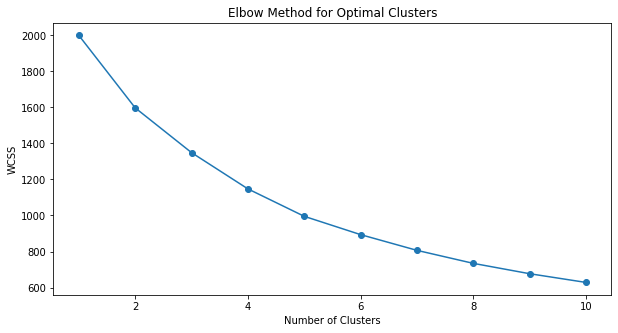

In [55]:
# Determine the optimal number of clusters using the Elbow Method
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_features)
    WCSS.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11), WCSS, marker= 'o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# Apply K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
# Add the cluster labels to the original dataframe
discount_df['Clusters'] = clusters

In [58]:
# Analyze the Clusters
print(discount_df.groupby('Clusters').mean())

          customer_id  order_count_before  order_count_after  \
Clusters                                                       
0         1464.614379           15.287582          11.281046   
1         1495.843931           10.005780          24.023121   
2         1479.643678            5.275862          11.683908   

          total_spend_before  total_spend_after  
Clusters                                         
0                3071.643607        4857.365896  
1                2803.955751        6353.269964  
2                1903.890821        4171.116396  


/tmp/ipykernel_68/1164287188.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(discount_df.groupby('Clusters').mean())


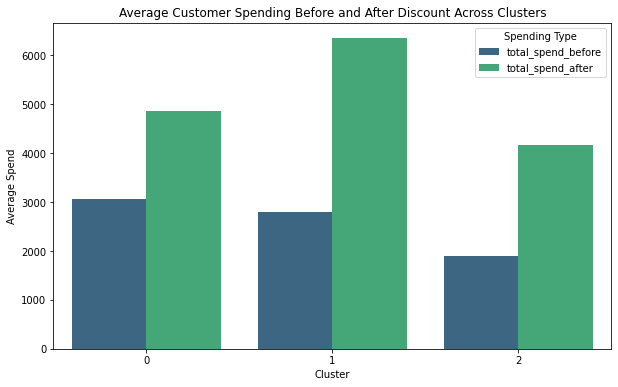

In [59]:
# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='Average Spend', hue='Spending Type', data=avg_spend, palette='viridis')

plt.title('Average Customer Spending Before and After Discount Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Spend')
plt.show()



From the above graph it can be observed that:

The customer segments and their spending behavior changes are:

Segment 1:

 Average spend  before: $3654.17
 
 Average spend  after: $7654.61
 
 Increase: $4000.44

Segment 2:

 Average spend before: $1041.59
 
 Average spend after: $4835.85
 
 Increase: $3794.26

Segment 0:

 Average spend before: $3514.87
 
 Average spend after: $2345.54
 
 Decrease: -$1169.33

Segments 1 and 2 showed a significant increase in spending after the discount campaign, indicating they are most responsive to discounts.

Overall Analysis:

Customers without discounts:

Average spend before: $2538.72

Average spend after: $5092.11

Increase: $2553.39

Customers with discounts:

Average spend before: $2607.67

Average spend after: $5181.59

Increase: $2573.92

Recommendation:

1. Targeted Discounts: Focus discounts on Segment 1 and Segment 2 as they showed the highest increase in spending.

2. Optimal Discount Rates:

 
 Customers with discounts spent slightly more than those without discounts suggesting moderate discounts are effective without heavily impacting profitability.

3. Strategy:
   Offer tiered discounts based on spending history:
     High-value customers (Segment 1): Smaller discounts to maintain profitability.
     Low-to-mid value customers (Segment 2): Higher discounts to encourage spending growth.
     Seasonal and limited-time discounts to drive peak sales periods while avoiding discount fatigue.


This balances increased revenue with controlled discount costs for long-term profitability.